In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json, math
from scipy import stats
import os
from scipy.stats import binned_statistic_2d

In [23]:
exponent=1
dir_name = "data_json"

# Scale factor vs shuffle amount

In [24]:
def load_network_errors(shuffle_amount, scale_factor):
    randoms = np.arange(10)
    errors = []
    for random in randoms:
        filename = f"hdreshuffle_and_ratioCTRNN_2DIR1O_dr100_n0.1_la0_sa{shuffle_amount:1}_sf{scale_factor:1}_e{exponent:.1f}_dp1.0_r{random}"
        filename = f"{dir_name}/{filename}.json"
        if os.path.isfile(filename):
            with open(filename) as f: info = json.load(f)
            errors.append(info["error_distractor"][2])
        else:
            print(f"does not exist: {filename}")
    return np.array(errors)

In [25]:
len(scale_factors)

29

In [26]:
shuffle_amounts = np.array([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160], dtype="float")#np.arange(0, 161, 10, dtype="float")
scale_factors = np.array([1.  , 1.05, 1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 ,
       1.55, 1.6 , 1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.25, 2.5 , 2.75, 3.  , 3.25, 3.5 , 3.75, 4.  ])
print(" ".join([f"{x:.2f}" for x in scale_factors]))

1.00 1.05 1.10 1.15 1.20 1.25 1.30 1.35 1.40 1.45 1.50 1.55 1.60 1.65 1.70 1.75 1.80 1.85 1.90 1.95 2.00 2.25 2.50 2.75 3.00 3.25 3.50 3.75 4.00


In [27]:
shuffle_amounts = np.arange(0, 161, 10, dtype="float")
shuffle_amounts = np.array([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160], dtype="float")#np.arange(0, 161, 10, dtype="float")
scale_factors = np.array([1.  , 1.05, 1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 ,
       1.55, 1.6 , 1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.25, 2.5 , 2.75, 3.  , 3.25, 3.5 , 3.75, 4.  ])
error_means = np.zeros((len(shuffle_amounts), len(scale_factors)), "float")

for i, shuffle_amount in enumerate(shuffle_amounts):
    for j, scale_factor in enumerate(scale_factors):
        errors = load_network_errors(shuffle_amount, scale_factor)
        error_means[i, j] = np.mean(errors)

does not exist: data_json/hdreshuffle_and_ratioCTRNN_2DIR1O_dr100_n0.1_la0_sa0.0_sf1.0_e1.0_dp1.0_r9.json
does not exist: data_json/hdreshuffle_and_ratioCTRNN_2DIR1O_dr100_n0.1_la0_sa10.0_sf1.0_e1.0_dp1.0_r9.json
does not exist: data_json/hdreshuffle_and_ratioCTRNN_2DIR1O_dr100_n0.1_la0_sa70.0_sf1.45_e1.0_dp1.0_r8.json
does not exist: data_json/hdreshuffle_and_ratioCTRNN_2DIR1O_dr100_n0.1_la0_sa70.0_sf1.45_e1.0_dp1.0_r9.json
does not exist: data_json/hdreshuffle_and_ratioCTRNN_2DIR1O_dr100_n0.1_la0_sa130.0_sf3.0_e1.0_dp1.0_r9.json
does not exist: data_json/hdreshuffle_and_ratioCTRNN_2DIR1O_dr100_n0.1_la0_sa135.0_sf3.0_e1.0_dp1.0_r9.json
does not exist: data_json/hdreshuffle_and_ratioCTRNN_2DIR1O_dr100_n0.1_la0_sa135.0_sf4.0_e1.0_dp1.0_r9.json
does not exist: data_json/hdreshuffle_and_ratioCTRNN_2DIR1O_dr100_n0.1_la0_sa140.0_sf3.0_e1.0_dp1.0_r9.json


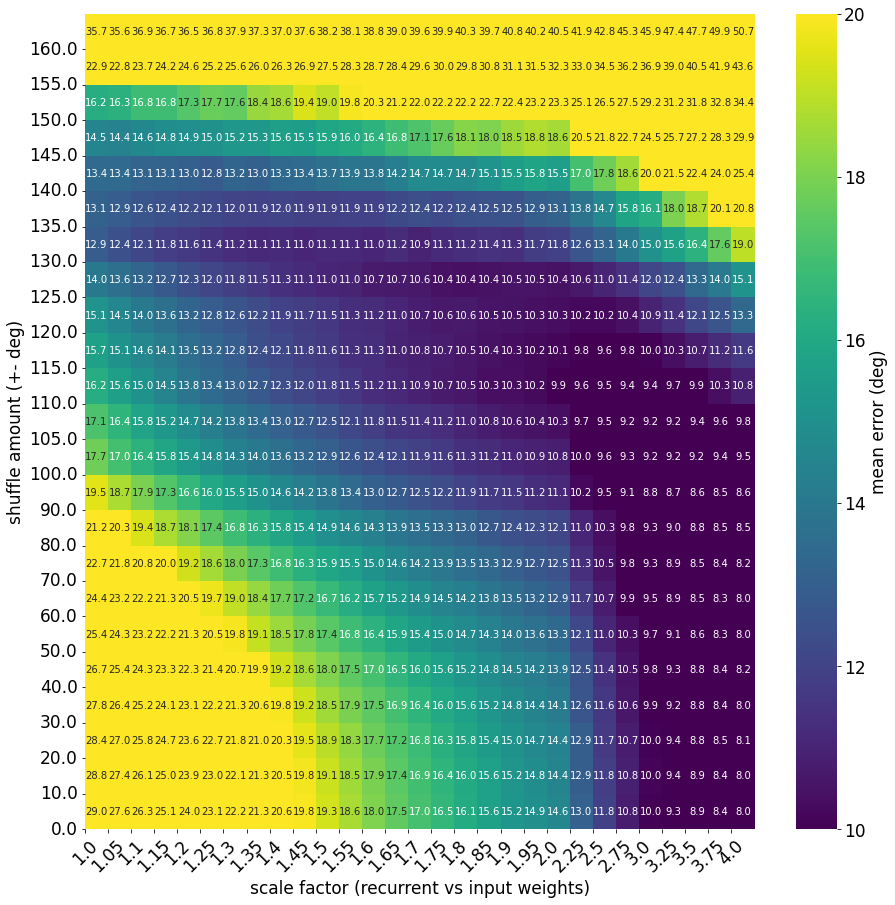

In [17]:
fig = plt.figure(figsize=(15, 15))
plt.rc('font', **{'family': 'DejaVu Sans', 'weight': 'normal', 'size': 17})
ax = sns.heatmap(error_means, cmap="viridis", annot=((error_means*10).astype(int)/10).astype(str), annot_kws={'fontsize': 10}, fmt='s', vmin=10, vmax=20, cbar_kws={'label': 'mean error (deg)'})
ax.invert_yaxis()
plt.xticks(range(len(scale_factors)), scale_factors, rotation=45)
plt.yticks(range(len(shuffle_amounts)), shuffle_amounts, rotation=0)
ax.set_xlabel("scale factor (recurrent vs input weights)")
ax.set_ylabel("shuffle amount (+- deg)")
plt.show()

# Structural vs Functional Connectivity

In [69]:
shuffle_amount = 80.0
scale_factor = 1.0

def load_structural_functional_connectivity_and_error(shuffle_amount, scale_factor, random):
    filename = f"hdreshuffle_and_ratioCTRNN_2DIR1O_dr100_n0.1_la0_sa{shuffle_amount:1}_sf{scale_factor:1}_e{exponent:.1f}_dp1.0_r{random}"
        
    filename1 = f"{dir_name}/{filename}.json"
    if os.path.isfile(filename1):
        with open(filename1) as f: info = json.load(f)
        info = {"error": info["error_distractor"][2], "error_nodistractor": info["error_nodistractor"][2]}
    else:
        print(f"does not exist: {filename1}")
        return None

    filename2 = f"{dir_name}/{filename}_connectivity.json"
    if os.path.isfile(filename2):
        with open(filename2) as f: info.update(json.load(f))
    else:
        print(f"does not exist: {filename2}")
        return None
        
    return info

        
factors = np.zeros((len(shuffle_amounts), len(scale_factors), 10, 6), "float") #structural, functional

for i, shuffle_amount in enumerate(shuffle_amounts):
    for j, scale_factor in enumerate(scale_factors):
        for k in range(10):
            res = load_structural_functional_connectivity_and_error(shuffle_amount, scale_factor, k)
            if res is None: continue
            factors[i, j, k] = [res["error"], res["structural_factor"], res["functional_factor"], scale_factor, shuffle_amount, res["error_nodistractor"]]

does not exist: data_json/hdreshuffle_and_ratioCTRNN_2DIR1O_dr100_n0.1_la0_sa0.0_sf1.0_e1.0_dp1.0_r9.json
does not exist: data_json/hdreshuffle_and_ratioCTRNN_2DIR1O_dr100_n0.1_la0_sa10.0_sf1.0_e1.0_dp1.0_r9.json
does not exist: data_json/hdreshuffle_and_ratioCTRNN_2DIR1O_dr100_n0.1_la0_sa70.0_sf1.45_e1.0_dp1.0_r8.json
does not exist: data_json/hdreshuffle_and_ratioCTRNN_2DIR1O_dr100_n0.1_la0_sa70.0_sf1.45_e1.0_dp1.0_r9.json
does not exist: data_json/hdreshuffle_and_ratioCTRNN_2DIR1O_dr100_n0.1_la0_sa130.0_sf3.0_e1.0_dp1.0_r9.json
does not exist: data_json/hdreshuffle_and_ratioCTRNN_2DIR1O_dr100_n0.1_la0_sa135.0_sf3.0_e1.0_dp1.0_r9.json
does not exist: data_json/hdreshuffle_and_ratioCTRNN_2DIR1O_dr100_n0.1_la0_sa135.0_sf4.0_e1.0_dp1.0_r9.json
does not exist: data_json/hdreshuffle_and_ratioCTRNN_2DIR1O_dr100_n0.1_la0_sa140.0_sf3.0_e1.0_dp1.0_r9.json
does not exist: data_json/hdreshuffle_and_ratioCTRNN_2DIR1O_dr100_n0.1_la0_sa155.0_sf2.75_e1.0_dp1.0_r9_connectivity.json
does not exist: d

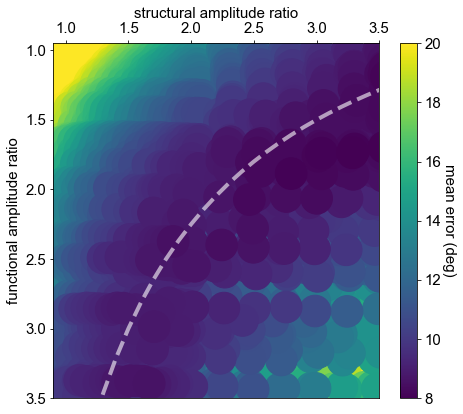

In [70]:
fig = plt.figure(figsize=(4.5*1.5, 4*1.5))
plt.rc('font', **{'family': 'Arial', 'weight': 'normal', 'size': 15})

vmin, vmax = 8, 20

sf = factors.reshape(-1, 6)[:, 3]
sa = factors.reshape(-1, 6)[:, 4]
filter = sa < 200

x = factors.reshape(-1, 6)[:, 1][filter]
y = factors.reshape(-1, 6)[:, 2][filter]
e = np.clip(factors.reshape(-1, 6)[:, 0], vmin, vmax)[filter]

order = np.arange(len(e))
order = np.argsort(e)[::-1]
scatter = plt.scatter(x[order], y[order], 1000, alpha=1, c=e[order], cmap='viridis', vmin=vmin, vmax=vmax)
cbar = plt.colorbar(scatter)
cbar.set_label('mean error (deg)', rotation=270, labelpad=15)

xx = np.linspace(0.1, 10, 100)
plt.plot(xx, 4.5/xx, "--", color="white", alpha=0.6, linewidth=4, label="structural * functional = 4.5")

plt.ylabel("functional amplitude ratio")
plt.xlabel("structural amplitude ratio")
#plt.legend(loc=1)

plt.ylim(.95, 3.5)
plt.xlim(.9, 3.5)
plt.gca().invert_yaxis()
plt.gca().tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
plt.gca().xaxis.set_label_position('top') 
plt.tight_layout()
#plt.savefig('paper_figures/_structural_functional_ratio.pdf', bbox_inches='tight')

/var/folders/47/5g669ycs2t17c0kkg2_np43m0000gn/T/ipykernel_83335/1951261557.py:9: RuntimeWarning: divide by zero encountered in true_divide
  x = 1/factors.reshape(-1, 6)[:, 1]
/var/folders/47/5g669ycs2t17c0kkg2_np43m0000gn/T/ipykernel_83335/1951261557.py:10: RuntimeWarning: divide by zero encountered in true_divide
  y = 1/factors.reshape(-1, 6)[:, 2]


N =  6639


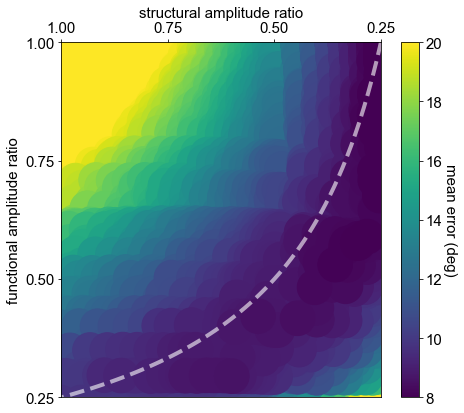

In [71]:
fig = plt.figure(figsize=(4.5*1.5, 4*1.5))
plt.rc('font', **{'family': 'Arial', 'weight': 'normal', 'size': 15})

vmin, vmax = 8, 20

sf = factors.reshape(-1, 6)[:, 3]
sa = factors.reshape(-1, 6)[:, 4]

x = 1/factors.reshape(-1, 6)[:, 1]
y = 1/factors.reshape(-1, 6)[:, 2]
e = np.clip(factors.reshape(-1, 6)[:, 0], vmin, vmax)

# limit the range of the shuffle amount, and remove all non-finite values
filter = (sa < 200) & (np.isfinite(x) & np.isfinite(y))
x = x[filter]
y = y[filter]
e = e[filter]

order = np.arange(len(e))
order = np.argsort(e)[::-1]
scatter = plt.scatter(x[order], y[order], 1200, alpha=1, c=e[order], cmap='viridis', vmin=vmin, vmax=vmax, rasterized=True)
cbar = plt.colorbar(scatter)
cbar.set_label('mean error (deg)', rotation=270, labelpad=15)

xx = np.linspace(0.01, 1, 100)
plt.plot(xx, 1/4/xx, "--", color="white", alpha=0.6, linewidth=4, label="structural * functional = 4.5")

plt.ylabel("functional amplitude ratio")
plt.xlabel("structural amplitude ratio")
#plt.legend(loc=1)

plt.ylim(1, 1/4)
plt.xlim(1, 1/4)
plt.xticks([1, 0.75, 0.5, 0.25])
plt.yticks([1, 0.75, 0.5, 0.25])
plt.gca().invert_yaxis()
plt.gca().tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
plt.gca().xaxis.set_label_position('top') 
plt.tight_layout()
print("N = ", np.sum(~np.isnan(x[order])))
plt.savefig('paper_figures/_structural_functional_ratio.pdf', bbox_inches='tight')

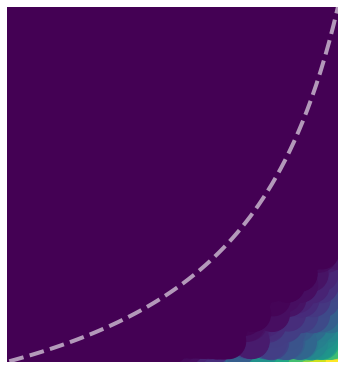

In [72]:
fig = plt.figure(figsize=(4*1.5, 4*1.5))
plt.rc('font', **{'family': 'Arial', 'weight': 'normal', 'size': 15})
e = np.clip(factors.reshape(-1, 6)[:, -1], vmin, vmax)[filter]

order = np.arange(len(e))
order = np.argsort(e)[::-1]
scatter = plt.scatter(x[order], y[order], 1200, alpha=1, c=e[order], cmap='viridis', vmin=vmin, vmax=vmax, rasterized=True)
cbar.set_label('mean error (deg)', rotation=270, labelpad=15)

xx = np.linspace(0.01, 1, 100)
plt.plot(xx, 1/4/xx, "--", color="white", alpha=0.6, linewidth=4, label="structural * functional = 4.5")

plt.ylabel("functional amplitude ratio")
plt.xlabel("structural amplitude ratio")
#plt.legend(loc=1)

plt.ylim(1, 1/4)
plt.xlim(1, 1/4)
plt.xticks([1, 0.75, 0.5, 0.25])
plt.yticks([1, 0.75, 0.5, 0.25])
plt.gca().invert_yaxis()
plt.gca().tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
plt.gca().xaxis.set_label_position('top') 
plt.tight_layout()
plt.axis('off')
plt.savefig('paper_figures/_structural_functional_ratio_nodistractor.pdf', bbox_inches='tight')

(0.9, 3.5, 3.5, 0.96)

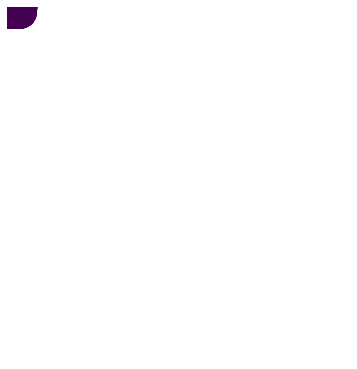

In [22]:
fig = plt.figure(figsize=(4*1.5, 4*1.5))
plt.rc('font', **{'family': 'Arial', 'weight': 'normal', 'size': 15})
e = np.clip(factors.reshape(-1, 6)[:, -1], vmin, vmax)[filter]

order = np.arange(len(e))
order = np.argsort(e)[::-1]
scatter = plt.scatter(x[order], y[order], 1000, alpha=1, c=e[order], cmap='viridis', vmin=vmin, vmax=vmax)
cbar.set_label('mean error (deg)', rotation=270, labelpad=15)

xx = np.linspace(0.1, 10, 100)
plt.plot(xx, 4.5/xx, "--", color="white", alpha=0.6, linewidth=4, label="structural * functional = 4.5")

plt.ylabel("functional amplitude ratio")
plt.xlabel("structural amplitude ratio")
#plt.legend(loc=1)

plt.ylim(.96, 3.5)
plt.xlim(.9, 3.5)
plt.gca().invert_yaxis()
plt.gca().tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
plt.gca().xaxis.set_label_position('top') 
plt.tight_layout()
plt.axis('off')
#plt.savefig('paper_figures/_structural_functional_ratio_nodistractor.pdf', bbox_inches='tight')

/var/folders/47/5g669ycs2t17c0kkg2_np43m0000gn/T/ipykernel_28617/473307950.py:10: RuntimeWarning: divide by zero encountered in true_divide
  x = 1/factors.reshape(-1, 6)[:, 1][filter]
/var/folders/47/5g669ycs2t17c0kkg2_np43m0000gn/T/ipykernel_28617/473307950.py:11: RuntimeWarning: divide by zero encountered in true_divide
  y = 1/factors.reshape(-1, 6)[:, 2][filter]


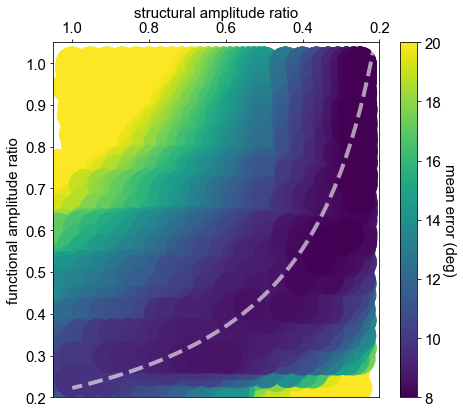

In [23]:
fig = plt.figure(figsize=(4.5*1.5, 4*1.5))
plt.rc('font', **{'family': 'Arial', 'weight': 'normal', 'size': 15})

vmin, vmax = 8, 20

sf = factors.reshape(-1, 6)[:, 3]
sa = factors.reshape(-1, 6)[:, 4]
filter = sa < 200

x = 1/factors.reshape(-1, 6)[:, 1][filter]
y = 1/factors.reshape(-1, 6)[:, 2][filter]
e = np.clip(factors.reshape(-1, 6)[:, 0], vmin, vmax)[filter]

order = np.arange(len(e))
order = np.argsort(e)[::-1]
scatter = plt.scatter(x[order], y[order], 1000, alpha=1, c=e[order], cmap='viridis', vmin=vmin, vmax=vmax)
cbar = plt.colorbar(scatter)
cbar.set_label('mean error (deg)', rotation=270, labelpad=15)

xx = np.linspace(0.01, 1, 100)
plt.plot(xx, 1/4.5/xx, "--", color="white", alpha=0.6, linewidth=4, label="structural * functional = 4.5")

plt.ylabel("functional amplitude ratio")
plt.xlabel("structural amplitude ratio")
#plt.legend(loc=1)

plt.ylim(1.05, 1/5)
plt.xlim(1.05, 1/5)
plt.gca().invert_yaxis()
plt.gca().tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
plt.gca().xaxis.set_label_position('top') 
plt.tight_layout()

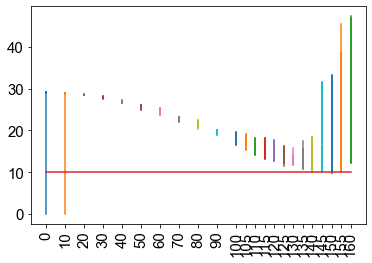

In [53]:
for i in range(23):
    plt.plot([shuffle_amounts[i]]*10, factors[i, 0, :, 0])
plt.xticks(shuffle_amounts, rotation=90)
plt.plot(shuffle_amounts, [10]*23)
plt.show()

/var/folders/47/5g669ycs2t17c0kkg2_np43m0000gn/T/ipykernel_83335/1426615739.py:7: RuntimeWarning: divide by zero encountered in true_divide
  t = 1/(x[filter]*y[filter])


(N = 4302)


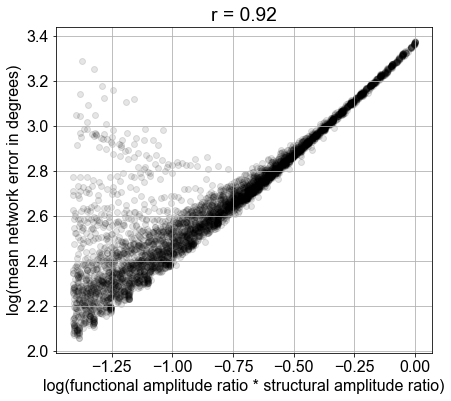

In [73]:
x = factors.reshape(-1, 6)[:, 1]
y = factors.reshape(-1, 6)[:, 2]
e = factors.reshape(-1, 6)[:, 0]

filter = (x*y<4.1) & (e<30)  # limit to a stable range of networks

t = 1/(x[filter]*y[filter])
k = e[filter]

# remove NaN and inf entries
msk = (np.isfinite(t) & np.isfinite(k))
t = t[msk]
k = k[msk]

t, k = np.log(t), np.log(k)

fig = plt.figure(figsize=(4.5*1.5, 4*1.5))
plt.rc('font', **{'family': 'Arial', 'weight': 'normal', 'size': 16})

# Calculate the correlation coefficient
corr_coeff = np.corrcoef(t, k)[0, 1]

# Create a scatter plot
plt.scatter(t, k, label='Data points', color='k', alpha=0.1, rasterized=True)

# Add labels and a legend
plt.xlabel('log(functional amplitude ratio * structural amplitude ratio)')
plt.ylabel('log(mean network error in degrees)')
plt.title(f'r = {corr_coeff:.2f}')

print(f"(N = {len(t)})")
plt.grid(True)
plt.savefig('paper_figures/correlation_structural_functional_ratio_vs_error.pdf', bbox_inches='tight')

# Backprop solutions functional/structural ratios

In [8]:
distractor_probability = ["1.0", "0.0"][1]
def load_backprop_structural_functional_connectivity_and_error(random):
    dir_name = "data_"
    filename = f"backpropCTRNN_2DIR1O_dr100_n0.1_la0_e1_dp{distractor_probability}_r{random}"

    filename1 = f"data/{filename}/info.json"
    if os.path.isfile(filename1):
        with open(filename1) as f: info = json.load(f)
        info = {"error": info["error_distractor"][2], "error_nodistractor": info["error_nodistractor"][2]}
    else:
        print(f"does not exist: {filename1}")
        return None

    filename2 = f"data_json/{filename}_connectivity.json"
    if os.path.isfile(filename2):
        with open(filename2) as f: info.update(json.load(f))
    else:
        print(f"does not exist: {filename2}")
        return None
        
    return info

In [9]:
factors = np.zeros((30, 6), "float") #structural, functional
factors[:] = np.nan

for k in range(30):
    res = load_backprop_structural_functional_connectivity_and_error(k)
    if res is None: continue
    factors[k] = [res["error"], res["structural_factor"], res["functional_factor"], 0, 0, res["error_nodistractor"]]

does not exist: data_json/backpropCTRNN_2DIR1O_dr100_n0.1_la0_e1_dp0.0_r2_connectivity.json
does not exist: data_json/backpropCTRNN_2DIR1O_dr100_n0.1_la0_e1_dp0.0_r14_connectivity.json
does not exist: data_json/backpropCTRNN_2DIR1O_dr100_n0.1_la0_e1_dp0.0_r29_connectivity.json


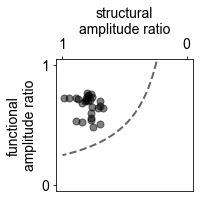

In [14]:
fig = plt.figure(figsize=(3, 3))
plt.rc('font', **{'family': 'Arial', 'weight': 'normal', 'size': 14})

vmin, vmax = 8, 20

sf = factors.reshape(-1, 6)[:, 3]
sa = factors.reshape(-1, 6)[:, 4]

x = 1/(factors.reshape(-1, 6)[:, 1])
y = 1/(factors.reshape(-1, 6)[:, 2])
structural = x
functional = y
e = np.clip(factors.reshape(-1, 6)[:, 0], vmin, vmax)

order = np.arange(len(e))
order = np.argsort(e)[::-1]
scatter = plt.scatter(x[order], y[order], 50, alpha=.5, color="k")

xx = np.linspace(0.01, 1, 100)
plt.plot(xx, 1/4/xx, "--", color="black", alpha=0.6, linewidth=2, label="structural * functional = 4.5")

plt.ylabel("functional\namplitude ratio")
plt.xlabel("structural\namplitude ratio")
#plt.legend(loc=1)

plt.ylim(1.05, -0.05)
plt.xlim(1.05, -0.05)
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.gca().invert_yaxis()
plt.gca().tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
plt.gca().xaxis.set_label_position('top') 
plt.tight_layout()
plt.savefig(f'paper_figures/_structural_functional_ratio_backprop_{distractor_probability}.pdf', bbox_inches='tight')

In [15]:
print("N=", np.sum(structural==structural))
print(f"structural= {np.nanmean(structural):.3f}+-{np.nanstd(structural):.3f}")
print(f"functional= {np.nanmean(functional):.3f}+-{np.nanstd(functional):.3f}")

N= 27
structural= 0.798+-0.074
functional= 0.663+-0.083


(N = 27)


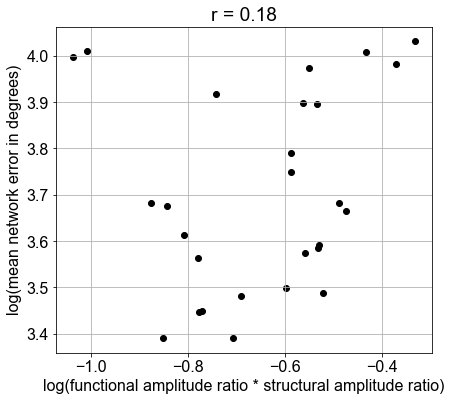

In [23]:
x = factors.reshape(-1, 6)[:, 1]
y = factors.reshape(-1, 6)[:, 2]
e = factors.reshape(-1, 6)[:, 0]

filter = [True]*(e.shape[0])#(x*y<4.1) & (e<30)  # limit to a stable range of networks

t = 1/(x[filter]*y[filter])
k = e[filter]

# remove NaN and inf entries
msk = (np.isfinite(t) & np.isfinite(k))
t = t[msk]
k = k[msk]

t, k = np.log(t), np.log(k)

fig = plt.figure(figsize=(4.5*1.5, 4*1.5))
plt.rc('font', **{'family': 'Arial', 'weight': 'normal', 'size': 16})

# Calculate the correlation coefficient
corr_coeff = np.corrcoef(t, k)[0, 1]

# Create a scatter plot
plt.scatter(t, k, label='Data points', color='k', alpha=1, rasterized=True)

# Add labels and a legend
plt.xlabel('log(functional amplitude ratio * structural amplitude ratio)')
plt.ylabel('log(mean network error in degrees)')
plt.title(f'r = {corr_coeff:.2f}')

print(f"(N = {len(t)})")
plt.grid(True)
#plt.savefig('paper_figures/correlation_structural_functional_ratio_vs_error.pdf', bbox_inches='tight')

# Inversion 

In [53]:
stable_unit_proportions = np.floor((50+np.linspace(0.25, 1, 20)*50))/100
stable_unit_proportions = np.array([0.62, 0.64, 0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82,
       0.84, 0.86, 0.88, 0.9 , 0.92, 0.94, 0.96, 1.  ]) 
scale_factors = np.array([1.  , 1.05, 1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 ,
       1.55, 1.6 , 1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.25, 2.5 , 2.75, 3.  , 3.25, 3.5 , 3.75, 4.  ])
randoms = [0, 1, 2, 3, 4, 5, 6, 8, 9, 10]

def load_structural_functional_connectivity_and_error_inv(stable_unit_proportion, scale_factor, random):
    filename = f"hdinversion_and_ratioCTRNN_2DIR1O_dr100_n0.1_la0_sf{scale_factor:1}_e1_sup{stable_unit_proportion:1}_dp1.0_r{random}"
    
    filename1 = f"{dir_name}/{filename}.json"
    if os.path.isfile(filename1):
        with open(filename1) as f: info = json.load(f)
        info = {"error": info["error_distractor"][2], "error_nodistractor": info["error_nodistractor"][2]}
    else:
        print(f"does not exist: {filename1}")
        return None

    filename2 = f"{dir_name}/{filename}_connectivity.json"
    if os.path.isfile(filename2):
        with open(filename2) as f: info.update(json.load(f))
    else:
        print(f"does not exist: {filename2}")
        return None
        
    return info

        
factors = np.zeros((len(stable_unit_proportions), len(scale_factors), 10, 6), "float") #structural, functional

for i, stable_unit_proportion in enumerate(stable_unit_proportions):
    for j, scale_factor in enumerate(scale_factors):
        for k, random in enumerate(randoms):
            res = load_structural_functional_connectivity_and_error_inv(stable_unit_proportion, scale_factor, random)
            if res is None: continue
            factors[i, j, k] = [res["error"], res["structural_factor"], res["functional_factor"], scale_factor, stable_unit_proportion, res["error_nodistractor"]]

does not exist: data_json/hdinversion_and_ratioCTRNN_2DIR1O_dr100_n0.1_la0_sf1.0_e1_sup0.62_dp1.0_r9_connectivity.json
does not exist: data_json/hdinversion_and_ratioCTRNN_2DIR1O_dr100_n0.1_la0_sf1.0_e1_sup0.62_dp1.0_r10_connectivity.json
does not exist: data_json/hdinversion_and_ratioCTRNN_2DIR1O_dr100_n0.1_la0_sf2.25_e1_sup0.84_dp1.0_r3_connectivity.json
does not exist: data_json/hdinversion_and_ratioCTRNN_2DIR1O_dr100_n0.1_la0_sf2.25_e1_sup0.84_dp1.0_r4_connectivity.json
does not exist: data_json/hdinversion_and_ratioCTRNN_2DIR1O_dr100_n0.1_la0_sf2.25_e1_sup0.84_dp1.0_r5_connectivity.json
does not exist: data_json/hdinversion_and_ratioCTRNN_2DIR1O_dr100_n0.1_la0_sf2.25_e1_sup0.84_dp1.0_r6_connectivity.json
does not exist: data_json/hdinversion_and_ratioCTRNN_2DIR1O_dr100_n0.1_la0_sf2.25_e1_sup0.84_dp1.0_r8_connectivity.json
does not exist: data_json/hdinversion_and_ratioCTRNN_2DIR1O_dr100_n0.1_la0_sf2.25_e1_sup0.84_dp1.0_r9_connectivity.json
does not exist: data_json/hdinversion_and

/var/folders/47/5g669ycs2t17c0kkg2_np43m0000gn/T/ipykernel_83335/1913587341.py:9: RuntimeWarning: divide by zero encountered in true_divide
  x = 1/factors.reshape(-1, 6)[:, 1]
/var/folders/47/5g669ycs2t17c0kkg2_np43m0000gn/T/ipykernel_83335/1913587341.py:10: RuntimeWarning: divide by zero encountered in true_divide
  y = 1/factors.reshape(-1, 6)[:, 2]


N =  5501


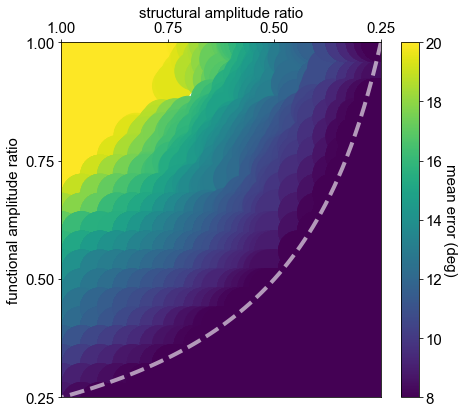

In [65]:
fig = plt.figure(figsize=(4.5*1.5, 4*1.5))
plt.rc('font', **{'family': 'Arial', 'weight': 'normal', 'size': 15})

vmin, vmax = 8, 20

sf = factors.reshape(-1, 6)[:, 3]
sa = factors.reshape(-1, 6)[:, 4]

x = 1/factors.reshape(-1, 6)[:, 1]
y = 1/factors.reshape(-1, 6)[:, 2]
e = np.clip(factors.reshape(-1, 6)[:, 0], vmin, vmax)

# limit the range of the shuffle amount, and remove all non-finite values
filter = (sa < 200) & (np.isfinite(x) & np.isfinite(y))
x = x[filter]
y = y[filter]
e = e[filter]

order = np.arange(len(e))
order = np.argsort(e)[::-1]
scatter = plt.scatter(x[order], y[order], 1500, alpha=1, c=e[order], cmap='viridis', vmin=vmin, vmax=vmax)
cbar = plt.colorbar(scatter)
cbar.set_label('mean error (deg)', rotation=270, labelpad=15)

xx = np.linspace(0.01, 1, 100)
plt.plot(xx, 1/4/xx, "--", color="white", alpha=0.6, linewidth=4, label="structural * functional = 4.5")

plt.ylabel("functional amplitude ratio")
plt.xlabel("structural amplitude ratio")
#plt.legend(loc=1)

plt.ylim(1, 1/4)
plt.xlim(1, 1/4)
plt.xticks([1, 0.75, 0.5, 0.25])
plt.yticks([1, 0.75, 0.5, 0.25])
plt.gca().invert_yaxis()
plt.gca().tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
plt.gca().xaxis.set_label_position('top') 
plt.tight_layout()
print("N = ", np.sum(~np.isnan(x[order])))
#plt.savefig('paper_figures/_structural_functional_ratio.pdf', bbox_inches='tight')

/var/folders/47/5g669ycs2t17c0kkg2_np43m0000gn/T/ipykernel_83335/1810993894.py:6: RuntimeWarning: divide by zero encountered in true_divide
  x = 1/factors.reshape(-1, 6)[:, 1]
/var/folders/47/5g669ycs2t17c0kkg2_np43m0000gn/T/ipykernel_83335/1810993894.py:7: RuntimeWarning: divide by zero encountered in true_divide
  y = 1/factors.reshape(-1, 6)[:, 2]


N =  5501


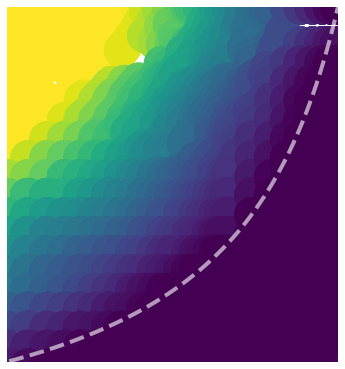

In [68]:
fig = plt.figure(figsize=(4*1.5, 4*1.5))
plt.rc('font', **{'family': 'Arial', 'weight': 'normal', 'size': 15})

vmin, vmax = 8, 20

x = 1/factors.reshape(-1, 6)[:, 1]
y = 1/factors.reshape(-1, 6)[:, 2]
e = np.clip(factors.reshape(-1, 6)[:, 0], vmin, vmax)

# limit the range of the shuffle amount, and remove all non-finite values
filter = (np.isfinite(x) & np.isfinite(y))
x = x[filter]
y = y[filter]
e = e[filter]

order = np.arange(len(e))
order = np.argsort(e)[::-1]
scatter = plt.scatter(x[order], y[order], 1200, alpha=1, c=e[order], cmap='viridis', vmin=vmin, vmax=vmax, rasterized=True)
#cbar = plt.colorbar(scatter)
cbar.set_label('mean error (deg)', rotation=270, labelpad=15)

xx = np.linspace(0.01, 1, 100)
plt.plot(xx, 1/4/xx, "--", color="white", alpha=0.6, linewidth=4, label="structural * functional = 4.5")

plt.ylabel("functional amplitude ratio")
plt.xlabel("structural amplitude ratio")
#plt.legend(loc=1)

plt.ylim(1, 1/4)
plt.xlim(1, 1/4)
plt.xticks([1, 0.75, 0.5, 0.25])
plt.yticks([1, 0.75, 0.5, 0.25])
plt.gca().invert_yaxis()
plt.gca().tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
plt.gca().xaxis.set_label_position('top') 
plt.tight_layout()
plt.axis('off')
print("N = ", np.sum(~np.isnan(x[order])))
plt.savefig('paper_figures/_structural_functional_ratio_inversion.pdf', bbox_inches='tight')

(1.0, 0.25, 0.25, 1.0)

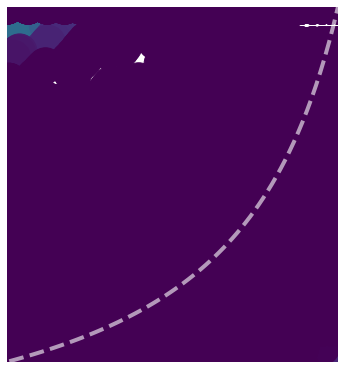

In [14]:
fig = plt.figure(figsize=(4*1.5, 4*1.5))
plt.rc('font', **{'family': 'Arial', 'weight': 'normal', 'size': 15})
e = np.clip(factors.reshape(-1, 6)[:, -1], vmin, vmax)[filter]

order = np.arange(len(e))
order = np.argsort(e)[::-1]
scatter = plt.scatter(x[order], y[order], 1200, alpha=1, c=e[order], cmap='viridis', vmin=vmin, vmax=vmax)
cbar.set_label('mean error (deg)', rotation=270, labelpad=15)

xx = np.linspace(0.01, 1, 100)
plt.plot(xx, 1/4/xx, "--", color="white", alpha=0.6, linewidth=4, label="structural * functional = 4.5")

plt.ylabel("functional amplitude ratio")
plt.xlabel("structural amplitude ratio")
#plt.legend(loc=1)

plt.ylim(1, 1/4)
plt.xlim(1, 1/4)
plt.xticks([1, 0.75, 0.5, 0.25])
plt.yticks([1, 0.75, 0.5, 0.25])
plt.gca().invert_yaxis()
plt.gca().tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
plt.gca().xaxis.set_label_position('top') 
plt.tight_layout()
plt.axis('off')
#plt.savefig('paper_figures/_structural_functional_ratio_nodistractor.pdf', bbox_inches='tight')